In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
dataset=pd.read_csv('deceptive-opinion.csv')

In [209]:
dataset.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [211]:
dataset['complete_text']=dataset['source'] + '' +dataset['text']

In [212]:
dataset.head()

,deceptive,hotel,polarity,source,text,complete_text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,TripAdvisorWe stayed for a one night getaway w...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,TripAdvisorTriple A rate with upgrade to view ...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,TripAdvisorThis comes a little late as I'm fin...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,TripAdvisorThe Omni Chicago really delivers on...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,TripAdvisorI asked for a high floor away from ...


In [213]:
dataset['deceptive'].value_counts()

deceptive    800
truthful     800
Name: deceptive, dtype: int64

# Preprocessing

In [214]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [215]:
y_data=dataset['deceptive'].values

In [216]:
y_data=le.fit_transform(y_data)

In [217]:
print(y_data)

[1 1 1 ... 0 0 0]


In [219]:
print(dataset['complete_text'])

0       TripAdvisorWe stayed for a one night getaway w...
1       TripAdvisorTriple A rate with upgrade to view ...
2       TripAdvisorThis comes a little late as I'm fin...
3       TripAdvisorThe Omni Chicago really delivers on...
4       TripAdvisorI asked for a high floor away from ...
                              ...                        
1595    MTurkProblems started when I booked the InterC...
1596    MTurkThe Amalfi Hotel has a beautiful website ...
1597    MTurkThe Intercontinental Chicago Magnificent ...
1598    MTurkThe Palmer House Hilton, while it looks g...
1599    MTurkAs a former Chicagoan, I'm appalled at th...
Name: complete_text, Length: 1600, dtype: object


## removing stopwords and stemming

In [220]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [221]:
sw=set(stopwords.words('english'))
ps=PorterStemmer()

def cleantext(sample):
    sample=sample.lower()
    sample=sample.replace("<br /><br />"," ")
    sample=re.sub("[^a-zA-Z]+"," ",sample)
    
    sample=sample.split(" ")
    sample=[ps.stem(s) for s in sample if s not in sw] # stemming and removing stopwords
    
    sample=" ".join(sample)
    
    return sample

In [222]:
cleantext(dataset['complete_text'][0])

'tripadvisorw stay one night getaway famili thursday tripl aaa rate steal th floor room complet plasma tv bose stereo voss evian water gorgeou bathroom tub fine us concierg help cannot beat locat flaw breakfast pricey servic slow hour four kid four adult friday morn even though two tabl restaur food good worth wait would return heartbeat gem chicago '

In [223]:
dataset['complete_text'][0]

'TripAdvisorWe stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n'

In [224]:
# Apply clean text function to each sms

dataset['cleanedmessage']=dataset['complete_text'].apply(cleantext)
corpus=dataset['cleanedmessage'].values

## vectorization/Feature extraction

In [225]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer


#CountVectorizer transformer from the sklearn.feature_extraction model has its own internal tokenization
#and normalization methods

cv=CountVectorizer(max_df=0.5,max_features=50000)

In [226]:
x_data=cv.fit_transform(corpus)
x_data.shape

(1600, 6626)

In [227]:
print(x_data[0])

  (0, 5955)	1
  (0, 3925)	1
  (0, 3794)	1
  (0, 2339)	1
  (0, 2012)	1
  (0, 5777)	1
  (0, 5962)	1
  (0, 0)	1
  (0, 4500)	1
  (0, 5400)	1
  (0, 5710)	1
  (0, 2146)	1
  (0, 1096)	1
  (0, 4215)	1
  (0, 5993)	1
  (0, 648)	1
  (0, 5412)	1
  (0, 6276)	1
  (0, 1914)	1
  (0, 6331)	1
  (0, 2399)	1
  (0, 474)	1
  (0, 5979)	1
  (0, 2091)	1
  (0, 6178)	1
  :	:
  (0, 3231)	1
  (0, 2127)	1
  (0, 675)	1
  (0, 4341)	1
  (0, 4985)	1
  (0, 5176)	1
  (0, 2698)	1
  (0, 2209)	2
  (0, 3032)	1
  (0, 83)	1
  (0, 2242)	1
  (0, 3571)	1
  (0, 1901)	1
  (0, 5750)	1
  (0, 6002)	1
  (0, 5624)	1
  (0, 4690)	1
  (0, 2168)	1
  (0, 2393)	1
  (0, 6564)	1
  (0, 6289)	1
  (0, 6568)	1
  (0, 4710)	1
  (0, 2583)	1
  (0, 2322)	1


In [228]:
# Assign weights to every word in the vocab using tf-idf
tfidf=TfidfTransformer()
x_data=tfidf.fit_transform(x_data)

In [229]:
print(x_data[0])

  (0, 6568)	0.055363262366652774
  (0, 6564)	0.11013088271174312
  (0, 6331)	0.09724154918875624
  (0, 6289)	0.08968710720125812
  (0, 6276)	0.22666939262047192
  (0, 6178)	0.0744228949359435
  (0, 6002)	0.08449936439507968
  (0, 5993)	0.10640595871100358
  (0, 5979)	0.1263540228293414
  (0, 5962)	0.2062256171099869
  (0, 5955)	0.1167832931260105
  (0, 5777)	0.18230793301639647
  (0, 5750)	0.09972472197072822
  (0, 5710)	0.10984864004551063
  (0, 5624)	0.14398670716838205
  (0, 5412)	0.1942667750631917
  (0, 5400)	0.18230793301639647
  (0, 5176)	0.12586650539016983
  (0, 4985)	0.05829416738009816
  (0, 4710)	0.09529227860440036
  (0, 4690)	0.07958139863614036
  (0, 4500)	0.09742531385516666
  (0, 4341)	0.16026949166130355
  (0, 4215)	0.1618641575059115
  (0, 3925)	0.06254868460732095
  :	:
  (0, 2698)	0.09069678493737839
  (0, 2604)	0.07753980359600562
  (0, 2583)	0.19964419140759157
  (0, 2399)	0.13687384125839097
  (0, 2393)	0.07763388384657685
  (0, 2339)	0.13982571615081857
  (0, 2

In [230]:
x_data.shape

(1600, 6626)

In [231]:
y_data.shape

(1600,)

In [232]:
## splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)

## Logistic regression

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
clf_lr= LogisticRegression(solver='liblinear', penalty='l1')
clf_lr.fit(X_train, y_train)
pred_lr=clf_lr.predict(X_test)
clf_lr.score(X_test,y_test)

0.8791666666666667

In [234]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       247
           1       0.81      0.99      0.89       233

    accuracy                           0.88       480
   macro avg       0.90      0.88      0.88       480
weighted avg       0.90      0.88      0.88       480



# MNB

In [235]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb=MultinomialNB(alpha=0.2)

clf_mnb.fit(X_train,y_train)
pred_mnb=clf_mnb.predict(X_test)
acc_mnb=clf_mnb.score(X_test,y_test)

#acc=accuracy_score(y_test,pred)
print("Accuracy : ",acc_mnb)

Accuracy :  0.9229166666666667


In [236]:
print(classification_report(y_test,pred_mnb))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       247
           1       0.94      0.90      0.92       233

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



## MLP

In [237]:
from keras import models
from keras.layers import Dense

In [238]:
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [239]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])

In [240]:
hist=model.fit(X_train,y_train,batch_size=128,epochs=100)

Epoch 1/100
1120/1120 [==============================] - 0s 152us/step - loss: 0.6897 - accuracy: 0.5973
Epoch 2/100
1120/1120 [==============================] - 0s 77us/step - loss: 0.6642 - accuracy: 0.8411
Epoch 3/100
1120/1120 [==============================] - 0s 82us/step - loss: 0.6308 - accuracy: 0.9250
Epoch 4/100
1120/1120 [==============================] - 0s 91us/step - loss: 0.5946 - accuracy: 0.9554
Epoch 5/100
1120/1120 [==============================] - 0s 96us/step - loss: 0.5548 - accuracy: 0.9589
Epoch 6/100
1120/1120 [==============================] - 0s 90us/step - loss: 0.5131 - accuracy: 0.9696
Epoch 7/100
1120/1120 [==============================] - 0s 95us/step - loss: 0.4699 - accuracy: 0.9732
Epoch 8/100
1120/1120 [==============================] - 0s 86us/step - loss: 0.4271 - accuracy: 0.9777
Epoch 9/100
1120/1120 [==============================] - 0s 97us/step - loss: 0.3848 - accuracy: 0.9848
Epoch 10/100
1120/1120 [==============================] - 0s 87

In [241]:
pred_mlp=model.predict(X_test)
pred_mlp[pred_mlp>=0.5]=1
pred_mlp[pred_mlp<0.5]=0
print(pred_mlp)

[[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.

In [242]:

from sklearn.metrics import accuracy_score
acc_mlp=accuracy_score(pred_mlp,y_test)
print(acc_mlp)

0.9125


In [243]:
acc_mlp=accuracy_score(pred_mlp,y_test)
print(acc_mlp)

0.9125


In [244]:
print(classification_report(y_test,pred_mlp))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       247
           1       0.91      0.91      0.91       233

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480



## Plotting

In [245]:
# FUNCTION TO CALCULATE TRUE POSITIVE, TRUE NEGATIVE ,FALSE POSITIVE AND FALSE NEGATIVE 

def perf_measure(y_actual, y_hat):
    y_actual=np.array(y_actual)
    y_hat=np.array(y_hat)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i] and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [246]:
classifiers=[]

classifiers.append(('LogisticRegression',clf_lr))
classifiers.append(('MNB',clf_mnb))
#classifiers.append(('LSTM',model1))
classifiers.append(('MLP',model))

In [247]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
result=[]
cnf_matric_parameter=[]
for i,v in classifiers:
    if i=='MLP':
        pred=v.predict(X_test)
        pred[pred>=0.5]=1
        pred[pred<0.5]=0
        print(pred)
        acc=accuracy_score(y_test,pred)
        precision = precision_score(y_test,pred)
        recall=recall_score(y_test, pred)
        f_measure=f1_score(y_test,pred)
        result.append((i,acc,precision,recall,f_measure))
        
        TP,FP,TN,FN=perf_measure(y_test,pred)
        cnf_matric_parameter.append((i,TP,FP,TN,FN))
        continue
        
    
    pred=v.predict(X_test)
    acc=accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    #print(precision)
    f_measure=f1_score(y_test,pred)
    result.append((i,acc,precision,recall,f_measure))
    
    TP,FP,TN,FN=perf_measure(y_test,pred)
    cnf_matric_parameter.append((i,TP,FP,TN,FN))

[[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.

In [248]:
column_names=['Algorithm','Accuracy','Precision','Recall','F-measure']
df1=pd.DataFrame(result,columns=column_names)
print(df1)

            Algorithm  Accuracy  Precision    Recall  F-measure
0  LogisticRegression  0.879167   0.807018  0.987124   0.888031
1                 MNB  0.922917   0.937500  0.901288   0.919037
2                 MLP  0.912500   0.906383  0.914163   0.910256


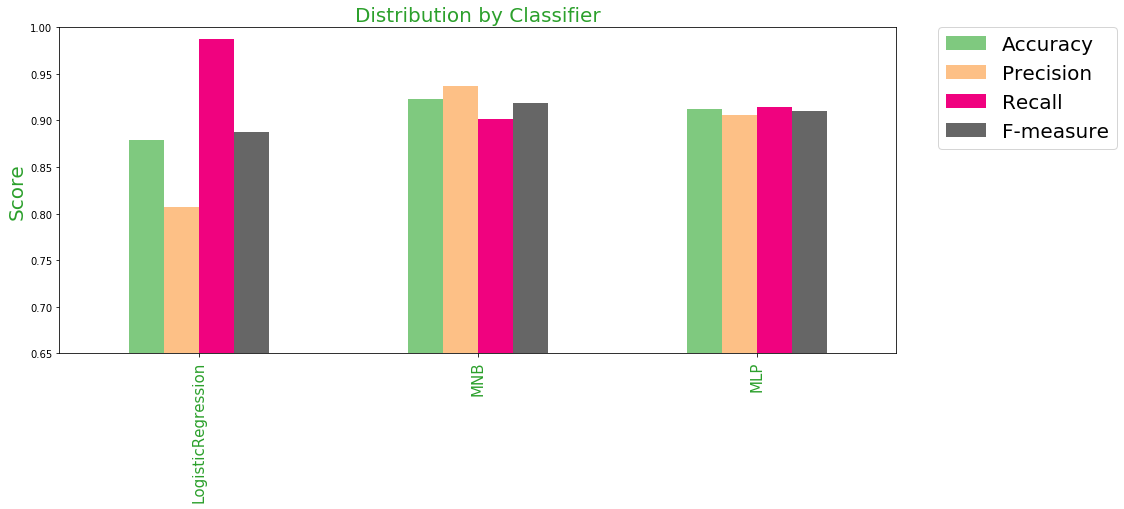

In [257]:
df1.plot(kind='bar', ylim=(0.65,1.0), figsize=(15,6), align='center', colormap="Accent")
plt.xticks(np.arange(3), df1['Algorithm'],fontsize=15,color='C2')
plt.ylabel('Score',fontsize=20,color='C2')
plt.title('Distribution by Classifier',fontsize=20,color='C2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)

# LSTM

In [195]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.callbacks import EarlyStopping

In [196]:
X=dataset['complete_text']
Y=dataset['deceptive']

le = LabelEncoder()
Y=le.fit_transform(Y)
Y=Y.reshape(-1,1)

# split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [197]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [198]:
def LSTM_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [199]:
model1 = LSTM_model()
model1.summary()
model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [200]:
model1.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/home/raju/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5349 - val_loss: 0.6842 - val_accuracy: 0.6029
Epoch 2/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.6610 - accuracy: 0.6903 - val_loss: 0.6224 - val_accuracy: 0.6801
Epoch 3/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.5053 - accuracy: 0.7904 - val_loss: 0.5367 - val_accuracy: 0.7463
Epoch 4/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.4504 - accuracy: 0.8162 - val_loss: 0.5169 - val_accuracy: 0.7574
Epoch 5/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.5130 - accuracy: 0.7978 - val_loss: 0.5043 - val_accuracy: 0.7426
Epoch 6/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.2966 - accuracy: 0.9007 - val_loss: 0.5212 - val_accuracy: 0.7463


In [201]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [202]:
accr = model1.evaluate(test_sequences_matrix,Y_test)

240/240 [==============================] - 0s 1ms/step


In [203]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.468
  Accuracy: 0.796


# compare

ValueError: could not convert string to float: 'MTurkHow should I start? Well, after staying at the Ambassador East Hotel, i realized it was my favorite hotel ever. The rooms are amazing. The food is great. The Pump room bar is awesome. I love this hotel. If your ever in Chicago, the Ambassador East Hotel is the place to go.\n'